In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
# Ścieżka do pliku CSV
file_name = 'times.csv'

# Odczytanie danych z pliku
df = pd.read_csv(file_name)

df.head()

,processes,time
0,1,0.000027
1,1,0.000029
2,1,0.000027
3,1,0.000027
4,1,0.000027


In [110]:
def plot_histogram(_df,proc,bins):
    """
    Funkcja rysuje histogramy dla danych czasów wykonania.
    """
    df = _df.loc[_df["processes"] == proc]

    plt.figure(figsize=(10, 6))

    # Rysowanie histogramu dla czasów wykonania
    plt.hist(df["time"], bins=bins)

    # Dodanie etykiet i tytułu
    plt.xlabel('Czas wykonania (s)')
    plt.ylabel('Liczba prób')
    plt.title('Histogram czasów wykonania dla różnych liczby procesów')

    # Wyświetlenie wykresu
    plt.grid(True)
    plt.show()


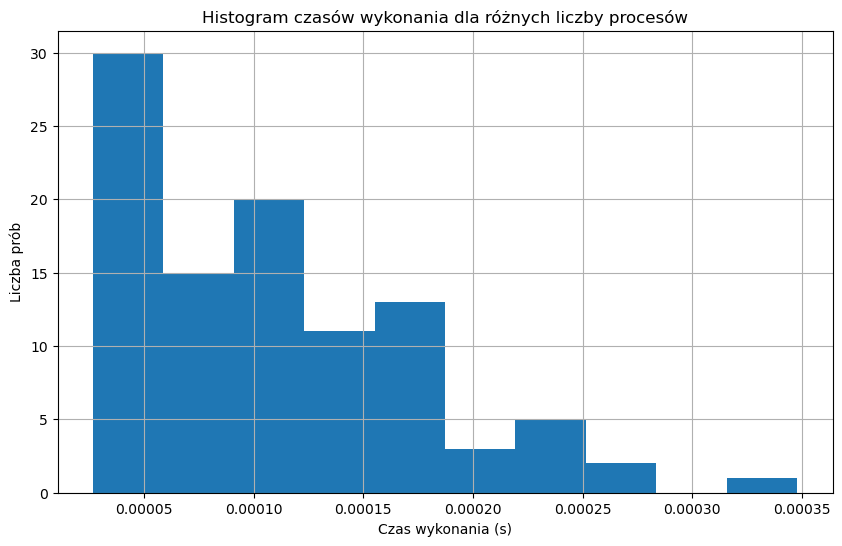

In [111]:
plot_histogram(df,4,10)

In [112]:
grouped = df.groupby('processes')['time'].agg(['mean', 'median'])
df = df.merge(grouped, on='processes', how='left')
df


,processes,time,mean,median
0,1,0.000027,0.000029,0.000027
1,1,0.000029,0.000029,0.000027
2,1,0.000027,0.000029,0.000027
3,1,0.000027,0.000029,0.000027
4,1,0.000027,0.000029,0.000027
...,...,...,...,...
195,4,0.000119,0.000109,0.000097
196,4,0.000042,0.000109,0.000097
197,4,0.000156,0.000109,0.000097
198,4,0.000225,0.000109,0.000097


In [116]:
time_seq = df.loc[df["processes"] == 1].iloc[1]["mean"]
df["su_ortodox"] = time_seq/df["mean"]
df

,processes,time,mean,median,su_ortodox
0,1,0.000027,0.000029,0.000027,1.000000
1,1,0.000029,0.000029,0.000027,1.000000
2,1,0.000027,0.000029,0.000027,1.000000
3,1,0.000027,0.000029,0.000027,1.000000
4,1,0.000027,0.000029,0.000027,1.000000
...,...,...,...,...,...
195,4,0.000119,0.000109,0.000097,0.261721
196,4,0.000042,0.000109,0.000097,0.261721
197,4,0.000156,0.000109,0.000097,0.261721
198,4,0.000225,0.000109,0.000097,0.261721
